## Linear Regression Model Development from Scratch with Hyperparameter Analysis on Synthetic Data



In [1]:
import numpy as np              # Importing numpy library
import time                      # import of time for calculation of time of a code
import seaborn as sns              # importing seaborn for plotting graphs
import pandas as pd                # importing pandas for the dataframe purposes
import matplotlib.pyplot as plt    # importing matplotlibrary for plotting of graphs

# 1) function to generate a data matrix X. Inputs: Number of samples, feature dimension. Output: Data matrix X.

In [2]:
def random_matrix(no_of_sample,feature_dimensions): 
    X= np.random.randn(no_of_sample,feature_dimensions) # Reference-1
    return X

In [3]:
np.random.seed(3)                  # Reference-2
X=random_matrix(1000,20)           # calling function to generate random matrix of given dimensions
X                                  # printing matrix

array([[ 1.78862847,  0.43650985,  0.09649747, ..., -1.54647732,
         0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ,  1.48614836, ..., -1.02387576,
         1.12397796, -0.13191423],
       [-1.62328545,  0.64667545, -0.35627076, ..., -1.86088953,
        -0.6028851 , -1.91447204],
       ...,
       [-0.15177326, -0.3708439 ,  0.37188789, ...,  0.49852788,
        -1.64914034, -0.80512733],
       [-0.77144831,  0.9875863 , -1.02573354, ..., -0.30905256,
        -0.98813113,  1.15336765],
       [ 0.20356845, -0.50773783, -2.47250303, ..., -0.38144291,
         0.5525641 ,  0.55971109]])

# Adding one coloumn in X data matrix of one values 

In [4]:
column=np.ones((X.shape[0],1))                 # creating a column of dimension (X.shape[0]=no of sample,1)
X= np.concatenate([column, X], axis=1) #it adds column of ones in X matrix ....Reference-3
X.shape                                # to check whether added a column or not

(1000, 21)

# 2)function to generate target from given input

In [5]:
def target_gen(X,W,N,bias):                  # N=Noise 
    W[0][0]=bias                              ## assigning first element of w = bias
    T=N+X@W.T                                 ## equation to get target values
    return T

In [6]:
W=np.random.rand(1,X.shape[1])                         # generating weights randomly for target calculation 
sigma=float(input('enter value of std deviation:'))    # taking std deviation of noise from user
N=np.random.normal(0,sigma,size=(X.shape[0],1))        # taking noise with mean=0..reference-4
bias=float(input('enter value of bias:'))              # taking value of bias from user
T=target_gen(X,W,N,bias)                               # calling taget function to calculate target matrix
T.shape                                                # checking shape of target matrix

enter value of std deviation:2
enter value of bias:0.2


(1000, 1)

# 3) function to generate linear regression estimate

In [7]:
def reg_estimate(X,W):
    Y=X@W.T                       ## @ for multiplication of matrix and .T for transpose
    return Y

In [8]:
W_Y=np.ones((1,X.shape[1]))      ## randomly generating weight matrix for model  reference-6
Y=reg_estimate(X,W_Y)                  ## calling function to give output of model at given inputs
Y.shape                                 ## checking the shape of Y

(1000, 1)

# 4)function to estimate mean squared error

In [9]:
def mse(Y,T):
    MSE=(np.sum((Y-T)**2))/(2*X.shape[0])   # X.shape[0]=no of samples, code gives direct substraction of t and y and squared sum of it
    return MSE                             # reference- A

In [10]:
mse(Y,T)

7.326015613978254

# 5) function to estimate the weight using pseudo inverse method

In [11]:
def pseudo_inverse(X,t,lamda_2):                    ## I discussed this with 3 22m0206,22m0802(cse dept.)
    W=(np.linalg.inv((X.T@X)/X.shape[0]+np.identity(X.shape[1])*lamda_2)@((X.T@t)/X.shape[0])).T # use of np.linalg.inv for inverse of x.T@x 
    Y=reg_estimate(X,W)          ## to get y estimate based on final weights given by pseudo matrix
    MSE=mse(Y,t)                  ## getting mse from target and y estimate from weights of pseudo matrix
    return W,MSE,Y                 ##   reference- A

In [12]:
W_p,MSE_p,Y_p=pseudo_inverse(X,T,.01)
np.sqrt(MSE_p)/(np.sqrt(T.var()))               ## to calculate NRMSE , T.var() # function to calculate variance of T

0.4987356164404828

In [13]:
W_p,MSE_p,Y_p.shape       ## checking the output of pseudo inverse function

(array([[ 0.23726345,  0.90644271,  0.33977389, -0.01508505, -0.06042286,
          0.25592895,  0.65862356,  0.19167677,  0.72522373,  0.44274429,
         -0.02719066,  0.66239976,  0.03462521,  0.35227267,  0.40623887,
          0.62548226,  0.40978789,  0.19175784, -0.06319337,  0.79048865,
          0.13754454]]),
 1.9695493441414305,
 (1000, 1))

# 6) function to compute gradient of MSE

In [14]:
def gradient(X,T,W):
    Y=reg_estimate(X,W)
    dMSE_dW=(X.T@(Y-T)/X.shape[0]).T # first element of all samlpe get multiply with respective(y-t) and sums up all gives dL/dW1 similarly other dL/dWj will be calculated using this matrix multiplication                       
    return dMSE_dW                     ## This visualization and discussion is done with friend from CSE dept. 22m0802

In [15]:
dMSE_dW=gradient(X,T,W_Y)
dMSE_dW                      # printing output of gradient of mse function

array([[0.56121798, 0.09677739, 0.79420402, 1.06805892, 1.07999799,
        0.52631621, 0.24492424, 0.79881326, 0.34468934, 0.59064586,
        0.99974697, 0.32491949, 1.04061993, 0.49079308, 0.45741762,
        0.42449506, 0.64802486, 0.61493607, 1.32393344, 0.13389305,
        0.93009347]])

# 7) function to compute l2 norm 

In [16]:
def l2_norm(W):                        ## function to calculate l2 norm of weights
    a=np.sum(W**2)-W[0][0]**2       ## sum of square of all elements - square of first element
    return a   

In [17]:
l2=l2_norm(W_Y)
l2

20.0

# 8) function to compute l2 norm gradient w.r.t w

In [18]:
def l2_gradient(W):
    l2_g=W.copy()             ### copy of W so that it will not change yhe main W values
    l2_g[0][0]=0                ## assigning first element (bias)=0
    return l2_g                # return of l2 gradient   

In [19]:
l2_g=l2_gradient(W_Y)              ## to check whether it is working right or not
l2_g

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

# 9)function to compute l1 norm of w

In [20]:

def l1_norm(W):
    a=np.sum(np.absolute(W))-np.absolute(W[0][0])    # sum of all absolute(elements) of w -absolute(first element)
    return a 

In [21]:
l_1_norm=l1_norm(W_Y)             ## l1 norm of weights taken for model Y
l_1_norm

20.0

# 10)function to calculate l1 gradient w.r.t w

In [22]:
def l1_gradient(W):
    l1_g=np.zeros((1,W.shape[1]))  ## making a 2d array of one values
    for j in range(X.shape[1]):
        if (W[0][j]>0):            ## if element in w >=0 condition is true then
            l1_g[0][j]=1            # updating value equal to one
        elif(W[0][j])<0:
            l1_g[0][j]=-1            ## if condition in if is not true then update that element as -1
        else:
            l1_g[0][0]=0               ## assigning first value (bias)=0
    return l1_g

In [23]:
l1=l1_gradient(W_Y)   ## printing output of l1 gradient function
l1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

# 11)function for single update of weight

In [24]:
def single_update(X,T,W,eta,lambda2,lambda1):                ## i discussed with 22m0206 and 22m0802(cse) student 
    W_update=W-eta*(gradient(X,T,W)+(lambda2/X.shape[0])*l2_gradient(W)+(lambda1/X.shape[0])*l1_gradient(W)) ## this will update the weight according to the overall gradient by considering both lambda1&2  eta= learning rate indicates how faster weights updates 
    Y=reg_estimate(X,W_update)            # use of regression estimate function to calculate y (output of model)
    MSE_update=mse(Y,T)+(lambda2/X.shape[0])*l2_norm(W_update)+(lambda1/X.shape[0])*l1_norm(W_update)              # use of mse function to calculate mse error based on new updated weights
    return W_update,MSE_update            # returning updated weights and its cirresponding mse

In [25]:
single_update(X,T,W_Y,0.01,.01,.01)        # checking working of function

(array([[0.99438772, 0.99903203, 0.99205776, 0.98931921, 0.98919982,
         0.99473664, 0.99755056, 0.99201167, 0.99655291, 0.99409334,
         0.99000233, 0.99675061, 0.9895936 , 0.99509187, 0.99542562,
         0.99575485, 0.99351955, 0.99385044, 0.98676047, 0.99866087,
         0.99069887]]),
 7.217412306968595)

# 12) function to estimate weight with given iterations and error

In [26]:
def weight_esstimation(X,T,eta,max_iter,min_change_NRMSE,lambda2=0,lambda1=0):     ## discussed with 22m0206 and 22m802(cse)
    j=1
    var=T.var()  # function to calculate variance of T
    W_Y=np.ones((1,X.shape[1]))      ## randomly generating weight matrix for model  reference-6
    y=reg_estimate(X,W_Y)                           # regression estimate on basis of initial weights
    mse_y=mse(y,T)                                  # initial mse based on initial weights
    NRMSE_old=(np.sqrt(mse_y))/(np.sqrt(var))                  ## old nrmse will be based on initial weights assumed                  
    W,MSE=single_update(X,T,W_Y,eta,lambda2,lambda1)      ## updating weights using GD
    NRMSE_updated=(np.sqrt(MSE)/(np.sqrt(var)))            # calling function for nrmse of updated weights
    while (j< max_iter and np.absolute(NRMSE_updated-NRMSE_old)>min_change_NRMSE): # applying given condition is satisfied then the weight is potimized to given conditions
        NRMSE_old=NRMSE_updated                            ## assigning updated nrmse as old one
        W,MSE=single_update(X,T,W,eta,lambda2,lambda1)      ## calling function to update the weight as it is not giving less error or when iterations are less than given
        NRMSE_updated=(np.sqrt(MSE))/(np.sqrt(var))         ## getting next updated nrmse
        j+=1                                                 ## increment in j so it will continue the loop until given conditions are valid(True)
    return W,NRMSE_updated                                   ## returning the final updated weights amd NRMSE acc to given conditions

In [27]:
weight_esstimation(X,T,0.01,1000,.001)

(array([[0.53162477, 0.93405429, 0.48453487, 0.25493289, 0.2425434 ,
         0.54499443, 0.79670474, 0.43013141, 0.78137409, 0.59740139,
         0.28092683, 0.76553557, 0.28497493, 0.6067961 , 0.63094824,
         0.71112221, 0.5654091 , 0.5011145 , 0.15615292, 0.88041037,
         0.36497457]]),
 0.5523177250106802)

# a) no of samples Vs NRMSE of training data and validation data

In [28]:
sns.set(rc={'figure.figsize':(11.5,8.2)})  ## to show large size of the boxplot(for zoom)... ref-5

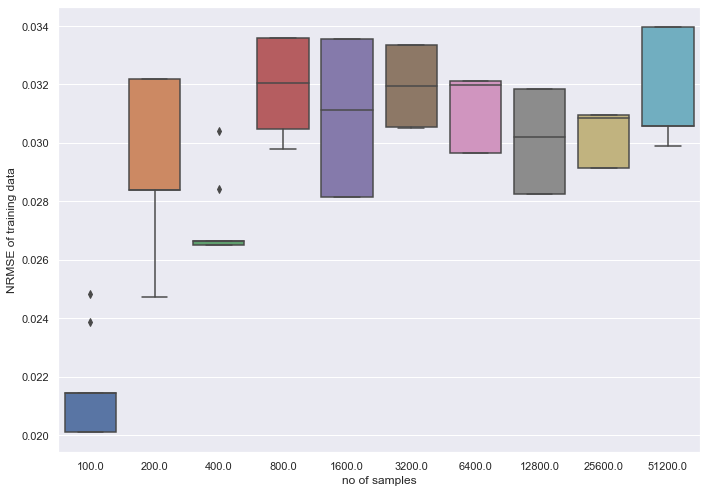

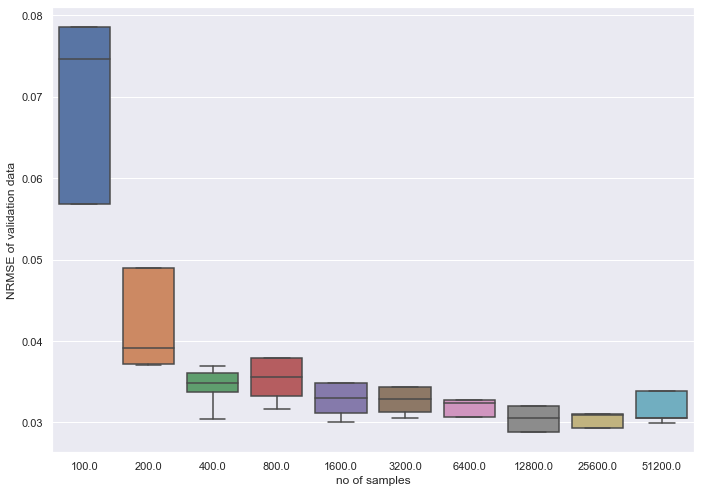

In [29]:
x=[]                             #empty list to add no of samples
y=[]                              # empty list to add nrmse of training data
z=[]                             #empty list to add nrmse of validation data
for i in range(10):               # loop to get multiple values for same set of samples created in second loop
    for j in range(10):                # loop to create multiple sample
        v=np.random.randint(50,150)   # to generate a vlue randomly reference- 6
        np.random.seed(v)             # random seed to generate different data
        m=100*(2**j)                  # varying number of samples
        n=70                          # no of features= constant
        X=random_matrix(m,n)           # calling function to generate random matrix of given dimensions
        column=np.ones((X.shape[0],1))  # creating a column of dimension (X.shape[0]=no of sample,1)
        X= np.concatenate([column, X], axis=1) #it adds column of ones in X matrix ....Reference-3               
        W_t=np.random.rand(1,X.shape[1])       # # generating weights randomly for target calculation
        bias=2                                 # value of bias
        sigma=0.2                              # giving the value of std deviation
        N=np.random.normal(0,sigma,size=(X.shape[0],1))   # generating noise in normal distribution mean=0
        T=target_gen(X,W_t,N,bias)                # calling target function to get target from given input matrix and weights
        W,MSE,Y=pseudo_inverse(X,T,0.01)          # getting optimal weights, mse,y from pseudo inverse method by calling function of it
        NRMSE=np.sqrt(MSE/T.var())                # NRMSE of mse obtained w.r.t std deviation of target matrix
        x.append(m)                          # appending no. of samples in x list
        y.append(NRMSE)                      # appending nrmse of training data in y list
                #validation
        g=np.random.randint(50,100)  # to generate a vlue randomly reference- 6
        np.random.seed(g)             # random seed to generate different data
        V=random_matrix(m,n)            # calling function to generate random matrix of given dimensions
        column=np.ones((V.shape[0],1))      # creating a column of dimension (X.shape[0]=no of sample,1)           
        V= np.concatenate([column, V], axis=1)  #it adds column of ones in X matrix ....Reference-3
        T1=target_gen(V,W_t,N,bias)              # calling target function to get target from given input matrix and weights of train targets
        Y1=reg_estimate(V,W)                     ## getting model output using the Weights obtained from pseudo inverse
        MSE1=mse(Y1,T1)                          ## mse calculation using Weights obtained from pseudo inverse
        NRMSE_v=np.sqrt(MSE1/T1.var())         ## NRMSE of mse obtained w.r.t std deviation of target matrix of validation data
        z.append(NRMSE_v)                 # appending nrmse of validation data in z list
a=np.array([x,y,z])                        # creating array by combining 3 lists
a=a.T                                      # trnspose of matrix a
df=pd.DataFrame(a,columns=['no of samples','NRMSE of training data','NRMSE of validation data']) ## making a dataframe of matrix a
sns.boxplot(y='NRMSE of training data',x='no of samples',data=df)  ## boxplot of no of sample vs nrmse of training data 
plt.show()                                                        # to show plot
sns.boxplot(y='NRMSE of validation data',x='no of samples',data=df)## boxplot of no of sample vs nrmse of validation data 
plt.show()                                                         # to show plot

# Observation
1)By observing the above two plots as sample increases in training data error get increased where as in the plot of validation as no of sample increases error becomes lesser and becomes converge.

2) genarally with increase in sample size model should fit good but in this case this may be happened because of random data generation, weights are unabl to get optimize because of large samples

3)But the as the no of samples increased the nrmse of both training and validation comes close to each other.

# b)no of features Vs NRMSE of training data and validation data

Comments for each line AS IN case A)

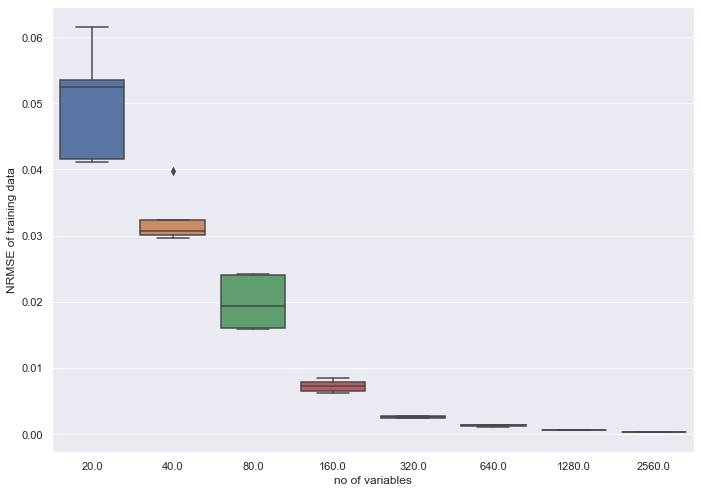

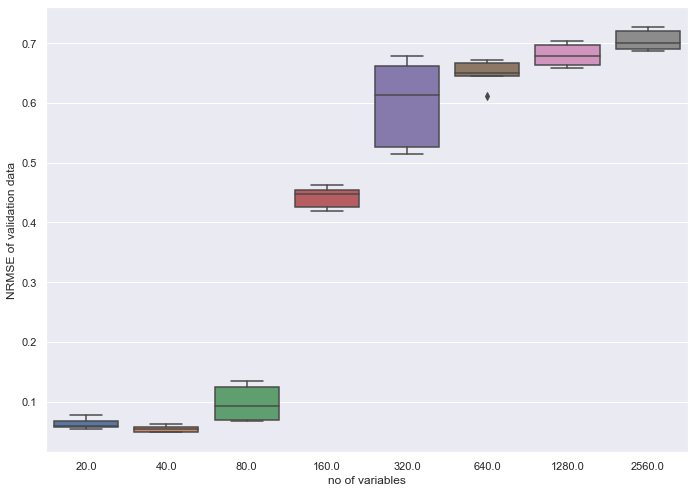

In [30]:
x=[]
y=[]
z=[]
for i in range(10): 
    for j in range(8):
        v=np.random.randint(1,50)
        np.random.seed(v)
        n=20*(2**j)     ## varying no of features
        m=100
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1))   
        T=target_gen(X,W_t,N,bias)
        W,MSE,Y=pseudo_inverse(X,T,0.01)
        NRMSE=np.sqrt(MSE/T.var())
        x.append(n)                  ## appending no of features to list x
        y.append(NRMSE)
                #validation
        g=np.random.randint(51,100)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)  
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        z.append(NRMSE_v)
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['no of variables','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='no of variables',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='no of variables',data=df)
plt.show()

# Observation
1)As the no of features increases the nrmse of training data goes down and in case of validation as no of features increases nrmse varies like sigmoid function. 

2)It indicates that the model is overfitted over training data and it is not working good for validation data.

3) validation nrmse is more than training nrmse.

# c) noise variance Vs NRMSE of training data and validation data

Comments for each line AS IN case A)

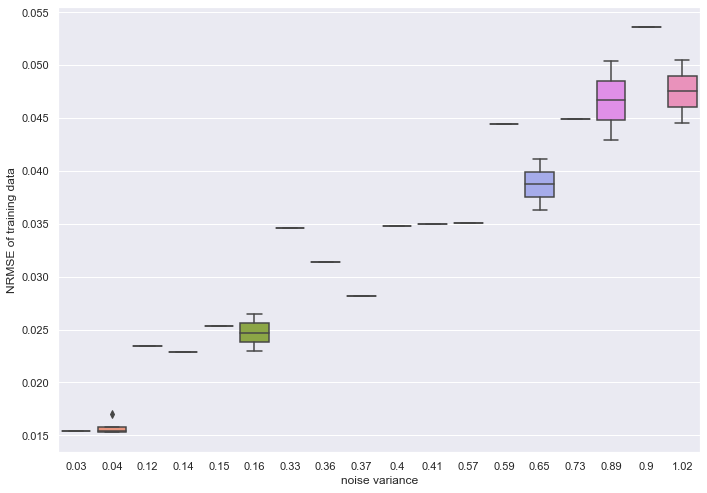

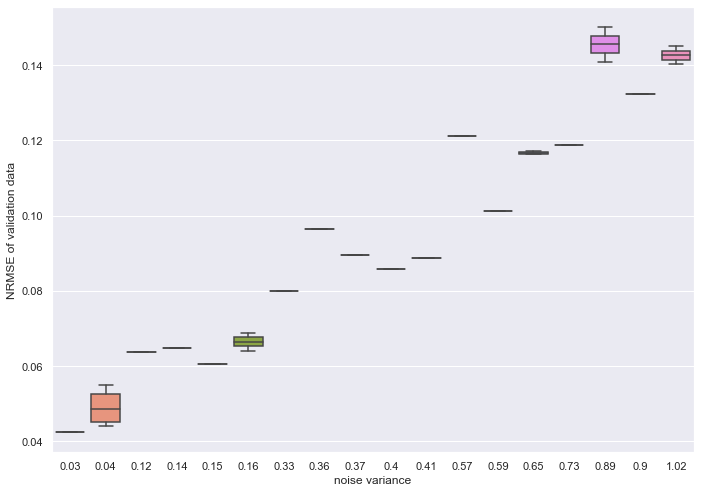

In [31]:
x=[]
y=[]
z=[]
s=[]
for i in range(1,6):
    for j in range(5):
        v=np.random.randint(101,200)
        np.random.seed(v)
        k=[0.2,0.4,0.6,0.8,1]
        m=300
        n=200
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=k[j]                                        ## different value of std deviation given from list k
        N=np.random.normal(0,sigma,size=(X.shape[0],1))   
        T=target_gen(X,W_t,N,bias)
        W,MSE,Y=pseudo_inverse(X,T,0.01)
        NRMSE=np.sqrt(MSE/T.var())
        x.append(np.round(N.var(),2))                       ## adding variance of noise
        y.append(NRMSE)
                #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        z.append(NRMSE_v)      
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['noise variance','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='noise variance',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='noise variance',data=df)
plt.show()

# Observation

1)The training and validation nrmse increases with increase in noise variance.

2)As the model will try to fit on the mean values but in actual because of increase in variance, error may be increased almost linearly. 

3)validation nrmse is more than training nrmse.

# d) Wo Vs NRMSE

Comments for each line AS IN case A)

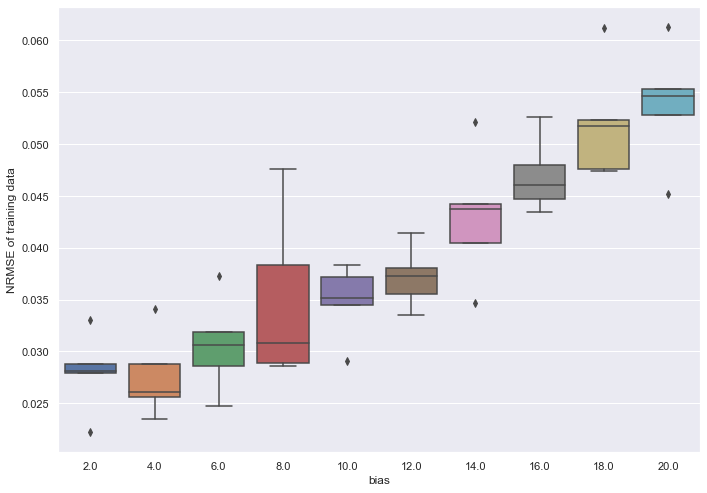

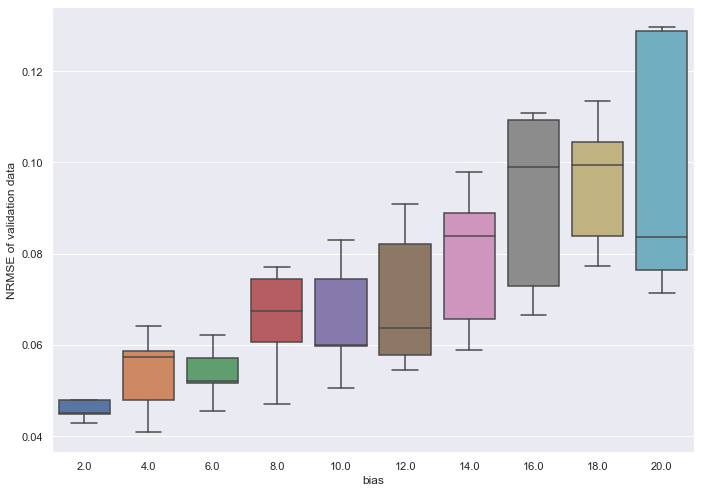

In [32]:
x=[]
y=[]
z=[]
for i in range(1,6):
    for j in range(2,21,2):
        v=np.random.randint(101,200)
        np.random.seed(v)
        m=100
        n=50
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=j                                  ## changing bias for each time in a loop and then repeating it
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1))   
        T=target_gen(X,W_t,N,bias)
        W,MSE,Y=pseudo_inverse(X,T,0.01)
        NRMSE=np.sqrt(MSE/T.var())
        x.append(bias)                            ## adding bias to list
        y.append(NRMSE)
                #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)  
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        z.append(NRMSE_v)
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['bias','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='bias',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='bias',data=df)
plt.show()

# Observation
1)As bias increases both training and validation nrmse increases almost linearly.but in general value of bias shifts the regression line it may increase or decrease the nrmse.

2)validation nrmse is more than training nrmse.

# e) lambda_2 Vs NRMSE

Comments for each line as in case A)

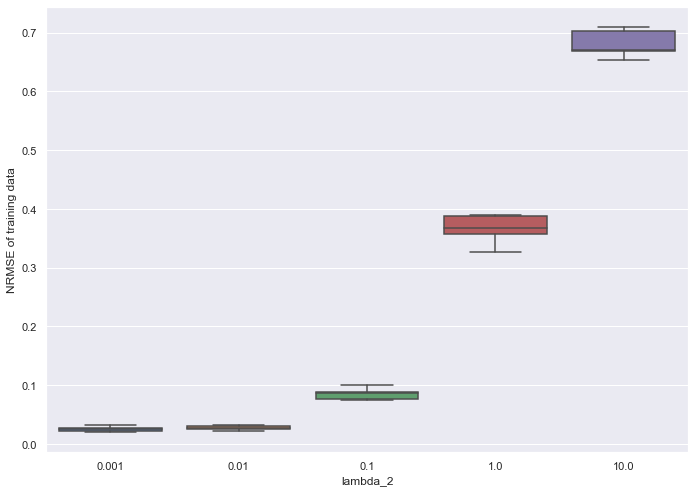

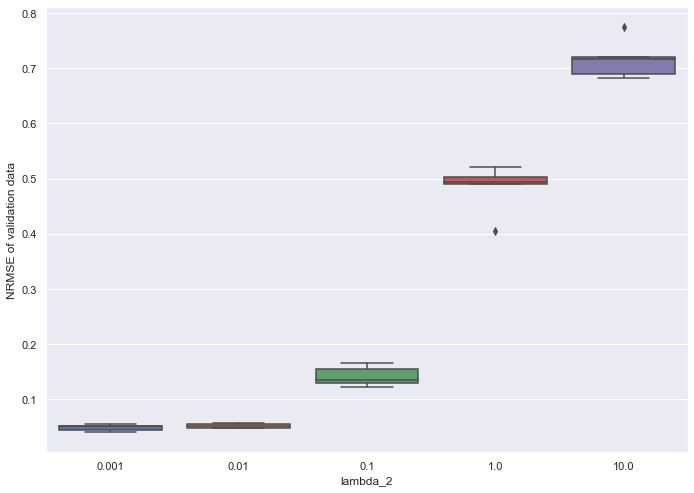

In [33]:
x=[]
y=[]
z=[]
for i in range(1,6):
    l=0.001                       ## initialize lambda with 0.001
    for j in range(5):
        v=np.random.randint(101,200)
        np.random.seed(v)
        lambda_2=l
        m=100
        n=50
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1))   
        T=target_gen(X,W_t,N,bias)
        W,MSE,Y=pseudo_inverse(X,T,lambda_2)
        NRMSE=np.sqrt(MSE/T.var())
        x.append(lambda_2)              ## appending lamda into list
        y.append(NRMSE)
                #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)  
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        z.append(NRMSE_v)
        l*=10                                  ## increasing lambda by 10 factor next execution of pseudo inverse
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['lambda_2','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='lambda_2',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='lambda_2',data=df)
plt.show()

# Observation
1)As lambda increases the nrmse for small values increses slowly but after 0.1 nmrse changes rapidly this is because more regularization leads to more error.

2)as per the graph shown in class as we increase the lambda our model will go away from the zero nrmse. higher lambda means more stability but  increased error.So, for selection of lambda we ahve to trade off between nrmse and stability.

3)the increase in nrmse is almost close for training as well as validation data.

# f) 1) time vs number of samples in psuedo matrix
Comments for each line as in case A)

<AxesSubplot:xlabel='no of samples', ylabel='time(miliseconds)'>

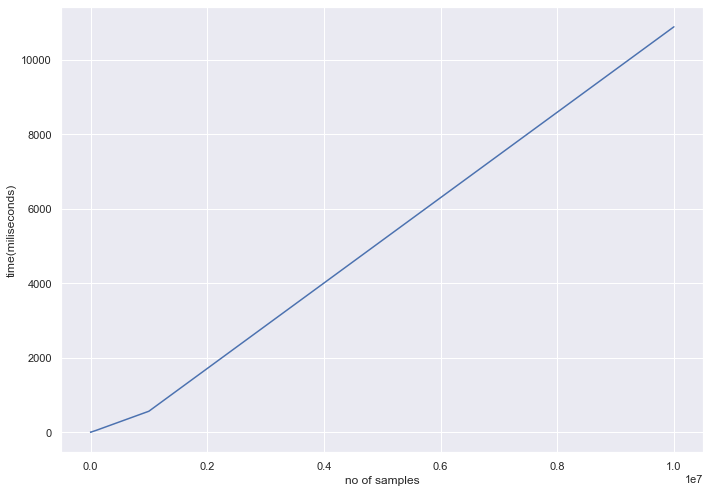

In [34]:
x=[]
y=[]
for j in range(8):
        np.random.seed(10)
        m=10**j                ## changing the sample every time
        n=20
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W,N,bias)
        W_Y=np.random.rand(1,X.shape[1])
        Y=reg_estimate(X,W_Y)
        a=time.time()
        W,MSE,Y=pseudo_inverse(X,T,0.01)
        b=time.time()
        y.append((b-a)*1000)   # appending time into list
        x.append(m)             #append of number of sample
a=np.array([x,y])
a=a.T
df=pd.DataFrame(a,columns=['no of samples','time(miliseconds)'])
sns.lineplot(y=df['time(miliseconds)'],x=df['no of samples'],data=df)

# observation
1)as number of samples increases the time for pseudo inverse increases almost linearly.

2)break occurs at no of samples=10**7,number of features=100 (constant) 

# f) 2) Time vs no of features in psuedo matrix

Comments for each line as in case A)

<AxesSubplot:xlabel='no of variables', ylabel='time(miliseconds)'>

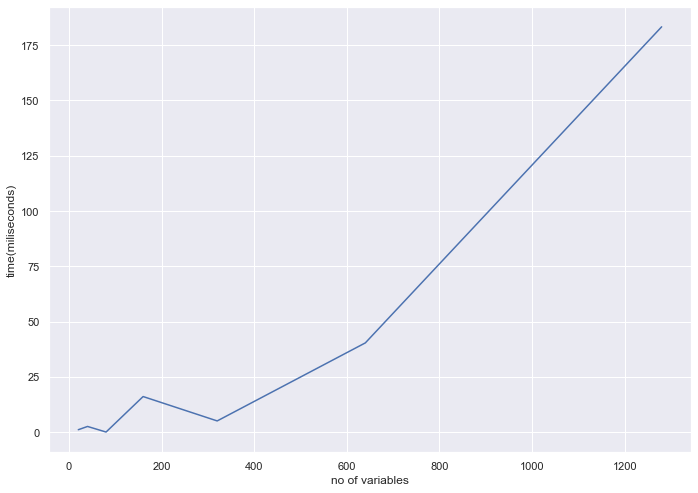

In [35]:
x=[]
y=[]

for j in range(7):
        np.random.seed(10)
        n=20*(2**j)                ## changing number of features each time
        m=200
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W,N,bias)
        W_Y=np.random.rand(1,X.shape[1])
        Y=reg_estimate(X,W_Y)
        a=time.time()
        W,MSE,Y=pseudo_inverse(X,T,0.01)
        b=time.time()
        y.append((b-a)*1000)            ##append time required for each estimation
        x.append(n)
a=np.array([x,y])
a=a.T
df=pd.DataFrame(a,columns=['no of variables','time(miliseconds)'])
sns.lineplot(y=df['time(miliseconds)'],x=df['no of variables'],data=df)

# Observation
as number of features increases the time increases in differently for different steps of features. as for pseudo inverse the ((no of features)**3)operations has to do.

the slope of time changes when no of features 400 and next when 600.
break occurs when no of features=20000 , no of samples=100.

# g) Training and validation NRMSE obtained using gradient descent with max_iter

Comments for each line as in case A)

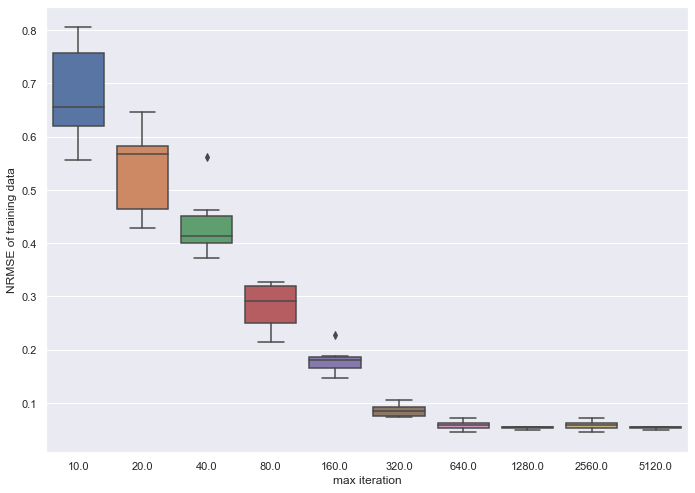

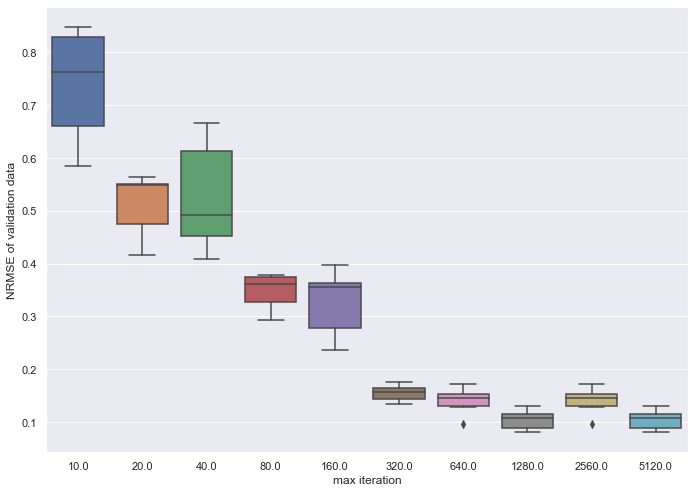

In [36]:
x=[]
y=[]
z=[]
for i in range(6):
    for j in range(10):
        v=np.random.randint(101,200)
        np.random.seed(v)
        m=100
        n=50
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W_t,N,bias)
        max_iter=10*(2**j)                               ## changing the max iterations for each time
        W_final,NRMSE_t=weight_esstimation(X,T,0.01,max_iter,.0001)
        #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W_final)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        x.append(max_iter)                  ## append max iterations in list
        y.append(NRMSE_t)
        z.append(NRMSE_v)
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['max iteration','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='max iteration',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='max iteration',data=df)
plt.show()

# Observation
1)the training and validation nrmse decreases as max iterations increases because it will update weights more number of times as max iterations increases.hence more updation of weights results in less error.
 
2)but in same way the training nrmse is less than validation.

# h) Training and validation NRMSE obtained using gradient descent with eta(learning rate)

Comments for each line as in case A)

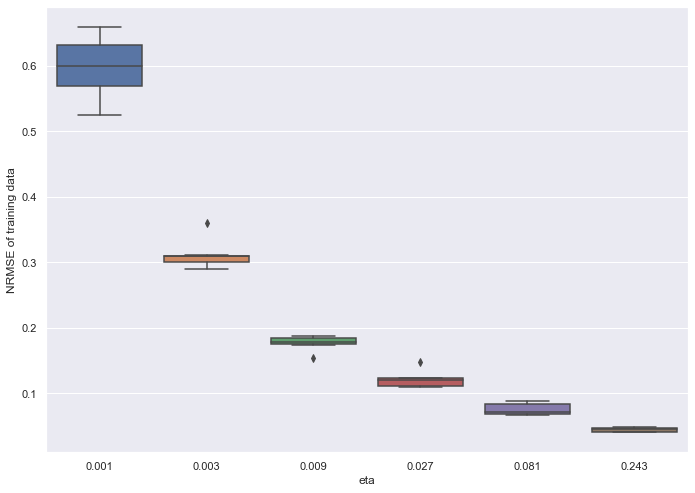

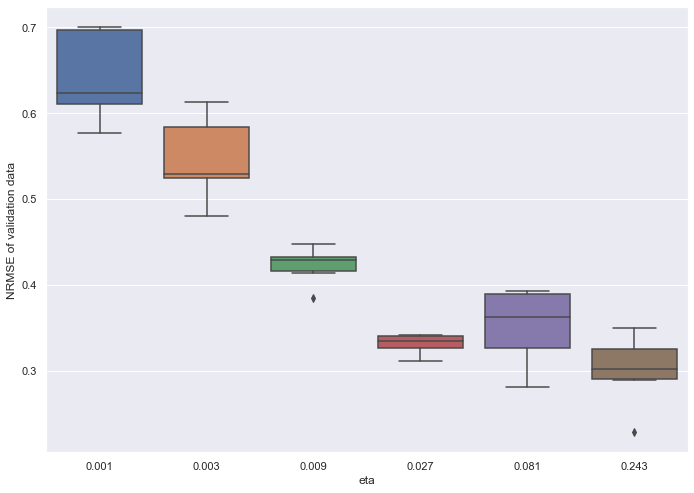

In [37]:
x=[]
y=[]                                 ## empty lists to add parameteres of bx plot
z=[]
for i in range(7):
    e=0.001                           # initialize of eta with 0.001 and then increase by a factor of 3
    for j in range(6):
        v=np.random.randint(101,200)
        np.random.seed(v)
        m=100
        n=100
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W_t,N,bias)
        eta=np.round(e,3)
        W_final,NRMSE_t=weight_esstimation(X,T,eta,1000,.001)
        #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1) 
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W_final)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        x.append(eta)                  # appending eta in list 
        y.append(NRMSE_t)
        z.append(NRMSE_v)
        e*=3
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['eta','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='eta',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='eta',data=df)
plt.show()

# Observation
1)as the eta(learning rate) increases the  weights will move faster towards the minimum nrmse in fixed iterations.so more learning rate gives less error within fixed iterations.

2)But after a point increase in eta may overshoot and error may get increase.

# i) 1)Time taken to solve gradient descent with number of samples and it's breaking point

Comments for each line as in case A)

<AxesSubplot:xlabel='no of samples', ylabel='time(miliseconds)'>

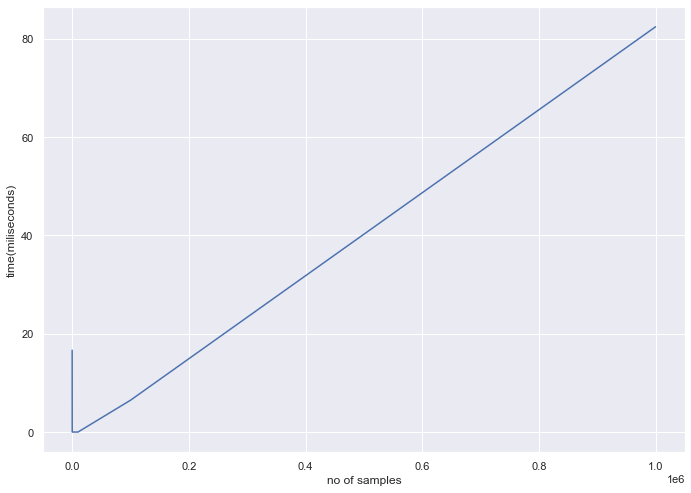

In [38]:
x=[]
y=[]
for j in range(6):
        np.random.seed(6)
        m=10**(j+1)                    ## changing the number of samples in the power of 10
        n=20
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W,N,bias)
        W_Y=np.random.rand(1,X.shape[1])
        a=time.time()                          # time start
        weight_esstimation(X,T,0.001,1000,.001)
        b=time.time()                          # time end
        x.append(m)
        y.append((b-a)*1000)
a=np.array([x,y])
a=a.T
df=pd.DataFrame(a,columns=['no of samples','time(miliseconds)'])
sns.lineplot(y=df['time(miliseconds)'],x=df['no of samples'],data=df) 

# Observation
1) As the number of samples increses the time for gradient descent inceases this is because to update weight every time need to calculate gradient of loss which means it has to go through all samples and hence more time required.

2) Unable to allocate 14.9 GiB for an array with shape (100000000, 20) and data type float64  changing 


# i) 2)Time taken to solve gradient descent with number of features and it's breaking point

Comments for each line as in case A)

C:\Users\alnea\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\alnea\AppData\Local\Temp\ipykernel_30340\4288938373.py:2: RuntimeWarning: overflow encountered in square
  MSE=(np.sum((Y-T)**2))/(2*X.shape[0])   # X.shape[0]=no of samples, code gives direct substraction of t and y and squared sum of it
C:\Users\alnea\AppData\Local\Temp\ipykernel_30340\2937832601.py:10: RuntimeWarning: invalid value encountered in double_scalars
  while (j< max_iter and np.absolute(NRMSE_updated-NRMSE_old)>min_change_NRMSE): # applying given condition is satisfied then the weight is potimized to given conditions


<AxesSubplot:xlabel='no of features', ylabel='time(miliseconds)'>

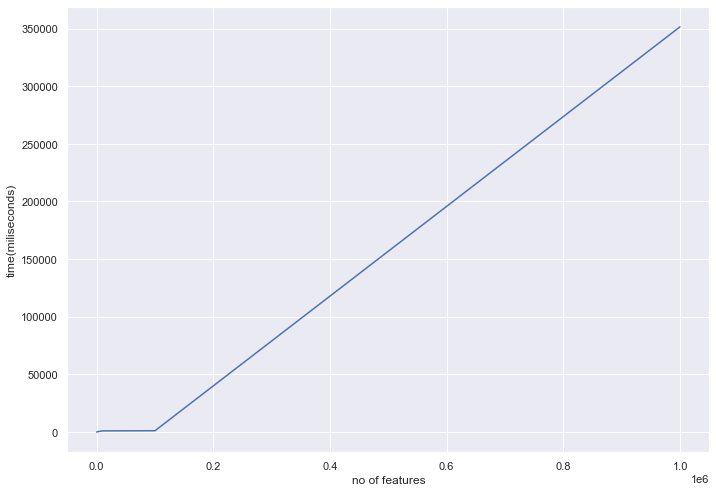

In [39]:
x=[]
y=[]
for j in range(6):
        np.random.seed(6)
        n=10**(j+1)              # changing the number of features
        m=200
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W,N,bias)
        W_Y=np.random.rand(1,X.shape[1])
        a=time.time()                           # start of time
        weight_esstimation(X,T,0.001,1000,.001)
        b=time.time()                            # end of time
        x.append(n)
        y.append((b-a)*1000)                     # addding time in millisecinds into list
a=np.array([x,y])
a=a.T
df=pd.DataFrame(a,columns=['no of features','time(miliseconds)'])
sns.lineplot(y=df['time(miliseconds)'],x=df['no of features'],data=df)

# Observation
1) as number of features increases the time increases but upto first for some steps of samples has lo time.

2)Unable to allocate 14.9 GiB for an array with shape (200, 10000001) and data type float64

# k) Training and validation NRMSE and number of nearly zero weights obtained by GD with lambda 2

Comments for each line as in case A)

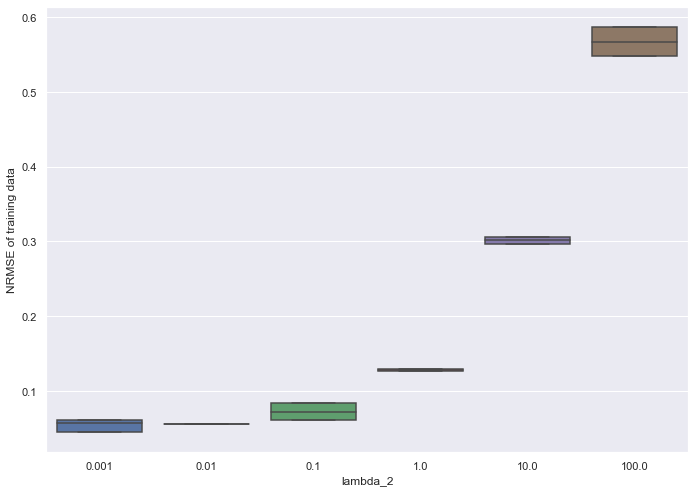

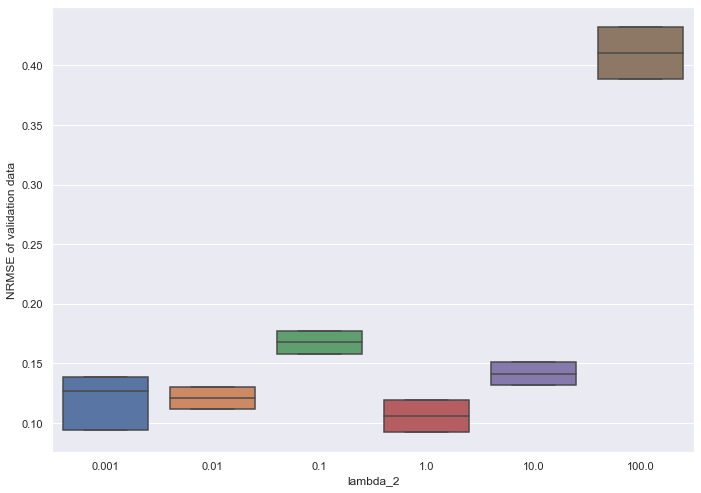

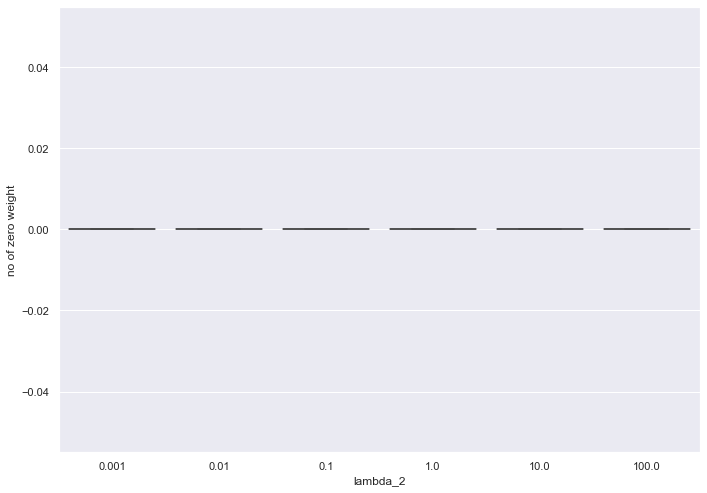

In [40]:
x=[]
y=[]
z=[]
w_zeros=[]                                       ## list to append number of zeros at a given lambda
for i in range(10):
    l=0.001                                       ## intializing lambda with 0.001
    for j in range(6):
        v=np.random.randint(101,200)
        np.random.seed(v)
        m=100
        n=50
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column,X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W_t,N,bias)
        W_final,NRMSE_t=weight_esstimation(X,T,0.1,1000,.001,lambda2=l)
        #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W_final)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        x.append(l)
        y.append(NRMSE_t)
        z.append(NRMSE_v)
        count=0
        w_0=np.round(W_final,2)
        for k in range(w_0.shape[1]):
            if np.absolute(w_0[0][k])==0:
                count+=1
        w_zeros.append(count)
        l*=10
a=np.array([x,y,z,w_zeros])
a=a.T
df=pd.DataFrame(a,columns=['lambda_2','NRMSE of training data','NRMSE of validation data','no of zero weight'])
sns.boxplot(y='NRMSE of training data',x='lambda_2',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='lambda_2',data=df)
plt.show()
sns.boxplot(y='no of zero weight',x='lambda_2',data=df)
plt.show()


# Observation
1)As lambda2 is increasing the nrmse of training as well as validation is increases but when lambda2 crosses value 1 rate of increasing nrmse increases rapidly like a exponential function.

2)this is because to avoid overfit we go for regularization and as we move towards the incrase in regularization term we move away from zero nrmse. We actually do trade off between regularization and error.

3)lambda 2 is making shrink of weight less than lambda 1

3)so selecting the optimum lambda2= 0.01 as it has nrmse ranging from 0.1 to 0.15 and making maximum two zeros of weights.

# l) Training and validation NRMSE and number of nearly zero weights obtained by GD with lambda 1

Comments for each line as in case A)

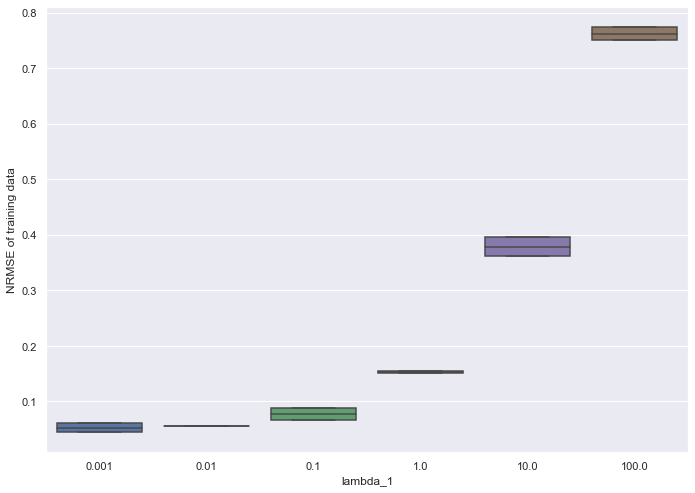

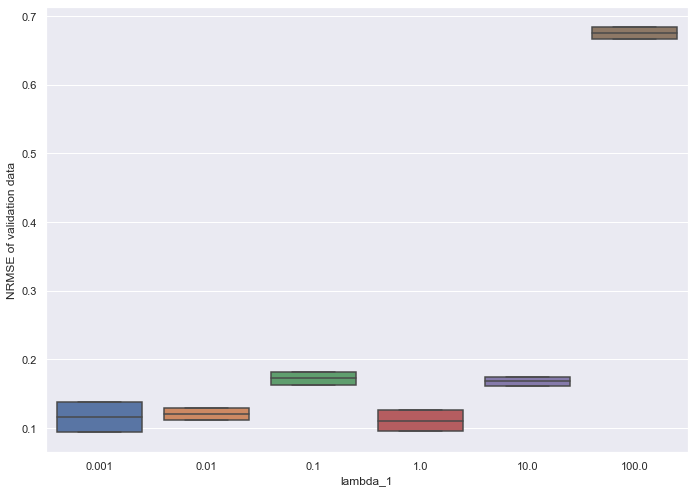

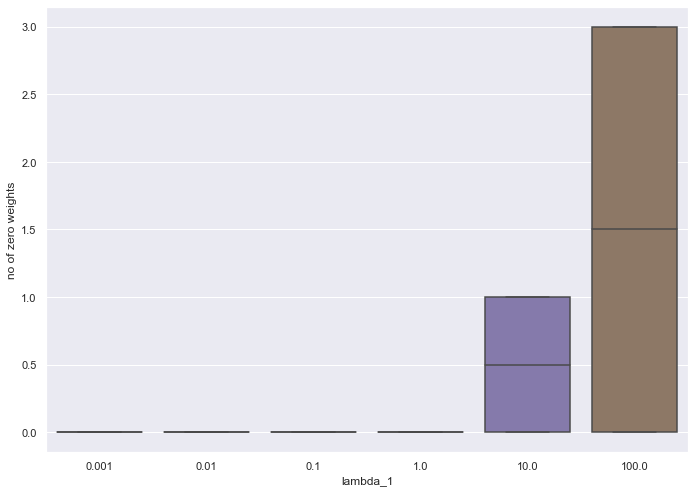

In [41]:
x=[]
y=[]
z=[]
w_zeros=[]                         ## list to append number of zeros at a given lambda
for i in range(0,10):
    l=0.001                             ## initializing lambda with 0.001
    for j in range(6): 
        v=np.random.randint(101,200)
        np.random.seed(v)
        m=100
        n=50
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=0.2
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W_t,N,bias)
        W_final,NRMSE_t=weight_esstimation(X,T,0.1,1000,.001,lambda1=l)
        #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W_final)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        x.append(l)
        y.append(NRMSE_t)
        z.append(NRMSE_v)
        count=0
        w_0=np.round(W_final,2)          ## rounding off the weight to one decimal so that we can get weights near to zero as zero 
        for k in range(w_0.shape[1]):
            if np.absolute(w_0[0][k])==0:        ## taking absolute of rounded value
                count+=1
        w_zeros.append(count)                    ## adding count of zeros in the list
        l*=10                                  ## taking new value of lamda by multiply with 10
a=np.array([x,y,z,w_zeros])
a=a.T
df=pd.DataFrame(a,columns=['lambda_1','NRMSE of training data','NRMSE of validation data','no of zero weights'])
sns.boxplot(y='NRMSE of training data',x='lambda_1',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='lambda_1',data=df)
plt.show()
sns.boxplot(y='no of zero weights',x='lambda_1',data=df)
plt.show()

# Observation
1)As the value of lambda1 increases the increase in nrmse of training was not much but after lambda1=1 onwards increse in lambda is increasing the nrmse of training data. for validation data nrmse is increasing with increase in lambda1 
 
 
 2) lambda 1 is making weights to shrink than lmbda 2
 
3)optimum lambda_1=10 as there is more nrmse than lesser values of lambda which has similar error which is 0.1 and the value 10 is  making two weight to zero.

# m) training and validation NRMSE for optimal lambda_2 with noise variance using GD  lambda_2_opt=0.01

Comments for each line as in case A)

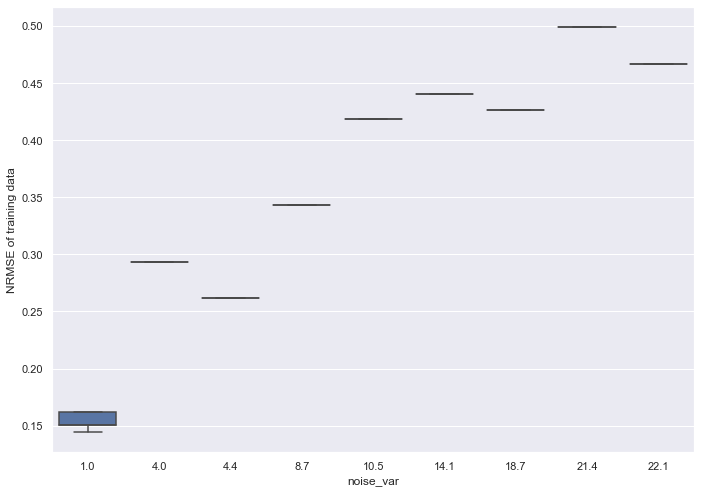

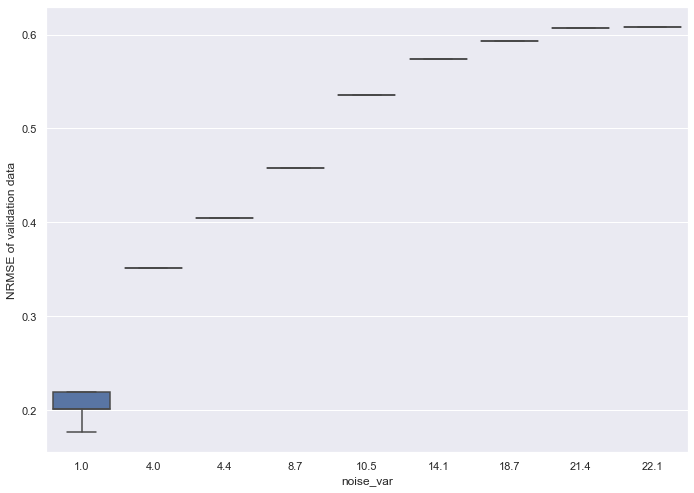

In [42]:
x=[]
y=[]
z=[]
for i in range(2,11,2):
    for j in range(5):
        v=np.random.randint(101,200)
        np.random.seed(v)
        m=200
        n=50
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=j+1                           ## changing std deviation to change variance of nrmse
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W_t,N,bias)
        W_final,NRMSE_t=weight_esstimation(X,T,eta,1000,.001,lambda2=0.01)  ## lambda2=0.01 optimal value
        #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column,V], axis=1)
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W_final)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        x.append(np.round(N.var(),1))
        y.append(NRMSE_t)
        z.append(NRMSE_v)
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['noise_var','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='noise_var',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='noise_var',data=df)
plt.show()

# observation

1) as noise variance of target vector is incresing the error is also increasing as more variance induactes more spread of data but model fits through some point for other it will creste error.

2)nrmse for validation is more than training data.

# n)training and validation NRMSE for optimal lambda_1 with noise variance using GD  opt lambda_1=10

Comments for each line as in case A)

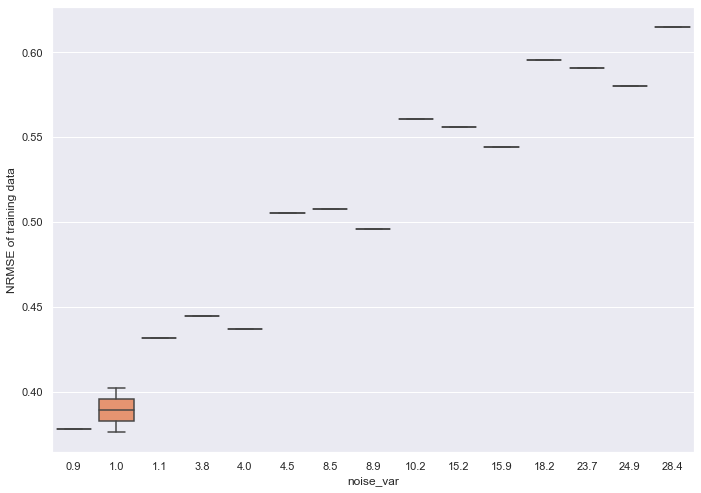

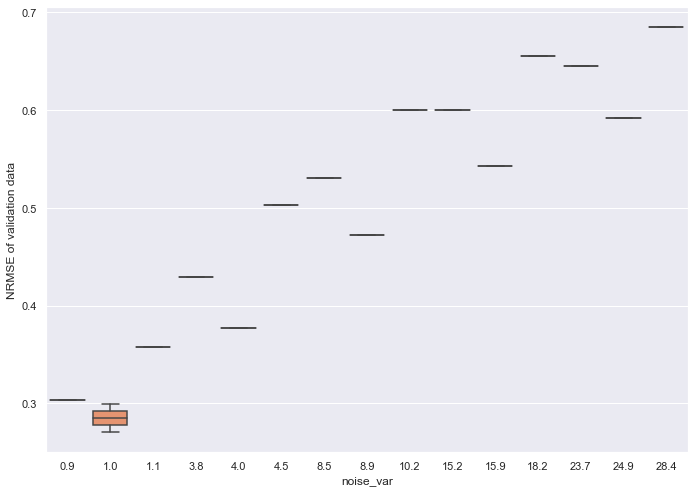

In [43]:
x=[]
y=[]
z=[]
for i in range(2,11,2):
    for j in range(5):
        v=np.random.randint(101,200)
        np.random.seed(v)
        m=200
        n=50
        X=random_matrix(m,n)
        column=np.ones((X.shape[0],1))                 
        X= np.concatenate([column, X], axis=1)
        W_t=np.random.rand(1,X.shape[1])
        bias=2
        sigma=j+1                           ## changing std deviation to change variance of nrmse
        N=np.random.normal(0,sigma,size=(X.shape[0],1)) 
        T=target_gen(X,W_t,N,bias)
        W_Y=np.random.rand(1,X.shape[1])
        W_final,NRMSE_t=weight_esstimation(X,T,0.01,1000,.001,lambda1=10) # lambda1=10 optimal value
        #validation
        g=np.random.randint(201,300)
        np.random.seed(g)
        V=random_matrix(m,n)
        column=np.ones((V.shape[0],1))                 
        V= np.concatenate([column, V], axis=1)  
        T1=target_gen(V,W_t,N,bias)
        Y1=reg_estimate(V,W_final)
        MSE1=mse(Y1,T1)
        NRMSE_v=np.sqrt(MSE1/T1.var())
        x.append(np.round(N.var(),1))
        y.append(NRMSE_t)
        z.append(NRMSE_v)
a=np.array([x,y,z])
a=a.T
df=pd.DataFrame(a,columns=['noise_var','NRMSE of training data','NRMSE of validation data'])
sns.boxplot(y='NRMSE of training data',x='noise_var',data=df)
plt.show()
sns.boxplot(y='NRMSE of validation data',x='noise_var',data=df)
plt.show()

# Observation
1)As the noise variance of training data increses for optimum lambda_1 the nrmse increases in somewhat linear manner for validation and training. because the nise variance tells that how much varuation is there so model will fit in between these two limits hence as more varaince leads to more deviation from model leads to more error.

3) for same noise variance nrmse of L1 regularization is higher than L2 regularization for optimal values.

2) The nrmse is more for validation than training data.

# 14) overall learning

1)learned about random data generation, and building functions

2) a differeent learning by use pandas,numpy libraries to do operations with data. Use of seaborn and matplotlib.pyplot libraries to plot the boxplots and line plots 

3) understood the actual scenario of how a machine learnig model is build to fit data

4)how visualization of data matrix operations reduces lenghth of code for function building.


5) there are two methods to calculate the optimal weights of model pseudo inverse method and gradient descent 

6) The error from pseudo inverse is less than gradient descent, but pseudo inverse method is limited to number of features and samples because it needs lot of multiplications.

7) how the lambda1 and lambda 2shrinks weights as their value increases.

8) as increase in regularization the error increases so we need to do trade off between stability of model and accuracy. as 

9) the model can overfit the training data as number of features inceased and performs low on validation data

10) The more noise in training data leads to more error in model.

11) increasing the maximum iterations in gradient descent leads to more optimise of weights.

12) As learning rate increases model converges but this may not posible to learning after a limit.

# 15)  I have discussed with the following students
A) A student from cse department 22M0802  

B) students from class
22M0206,22M0211


1) np.random.randn()   function taken from https://www.geeksforgeeks.org/numpy-random-randn-python/

2) np.random.seed() function taken from https://www.analyticsvidhya.com/blog/2021/12/what-does-numpy-random-seed-do/

3) np.concatenate([column, X], axis=1)            function taken from https://thispointer.com/how-to-add-columns-to-numpy-array-in-python/

4)# np.random.normal(0,sigma,size=(X.shape[0],1)) function taken from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

5)# sns.set(rc={'figure.figsize':(11.5,8.2)}) function taken from https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

6) np.random.randint() https://www.geeksforgeeks.org/how-to-create-a-matrix-of-random-integers-in-python/
